In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [2]:
print("Loading MNIST Data")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Loading MNIST Data


Displaying first 16 numbers of the data


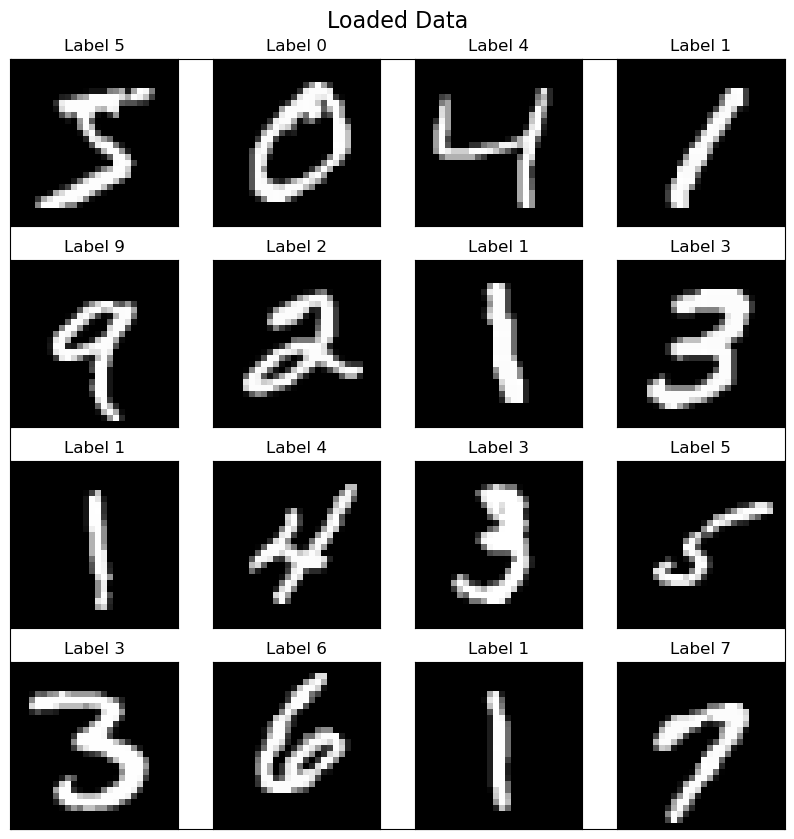

In [3]:
print("Displaying first 16 numbers of the data")
plt.figure(figsize=(10, 10))
plt.title("Loaded Data", fontsize=16, y= 1.03)
plt.xticks([])
plt.yticks([])
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label {y_train[i]}")
plt.show()

In [4]:
print("Know the shape of the data")
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

Know the shape of the data
(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


In [5]:
print("Normalizing the data")
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

Normalizing the data


In [6]:
print("Reshaping the data")
X_train = tf.reshape(X_train, [X_train.shape[0], 28, 28, 1])
X_test = tf.reshape(X_test, [X_test.shape[0], 28, 28, 1])

Reshaping the data


2024-05-15 02:08:30.469161: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-15 02:08:30.469197: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-15 02:08:30.469204: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-15 02:08:30.469456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-15 02:08:30.469474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
print("Creating the layers of the model")
model = Sequential(
    [
        Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='linear')
    ]
)

Creating the layers of the model


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
print("Specifying the loss function and optimizer method")
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])


Specifying the loss function and optimizer method


In [9]:
print("Training the model")
model.fit(X_train, y_train, epochs=20)

Training the model
Epoch 1/20


2024-05-15 02:08:34.704860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9029 - loss: 0.3265
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9816 - loss: 0.0572
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9885 - loss: 0.0349
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9934 - loss: 0.0217
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9941 - loss: 0.0175
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9954 - loss: 0.0131
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9973 - loss: 0.0079
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9971 - loss: 0.0091
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9967 - loss: 0.0112
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9973 - loss: 0.0078
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9982 - loss: 0.0055
Epoch 12/20
1875/18

In [10]:
print("Evaluating the model")
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Model Accuracy = {val_acc:0.2%}")

Evaluating the model
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9831 - loss: 0.1194
Model Accuracy = 98.55%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


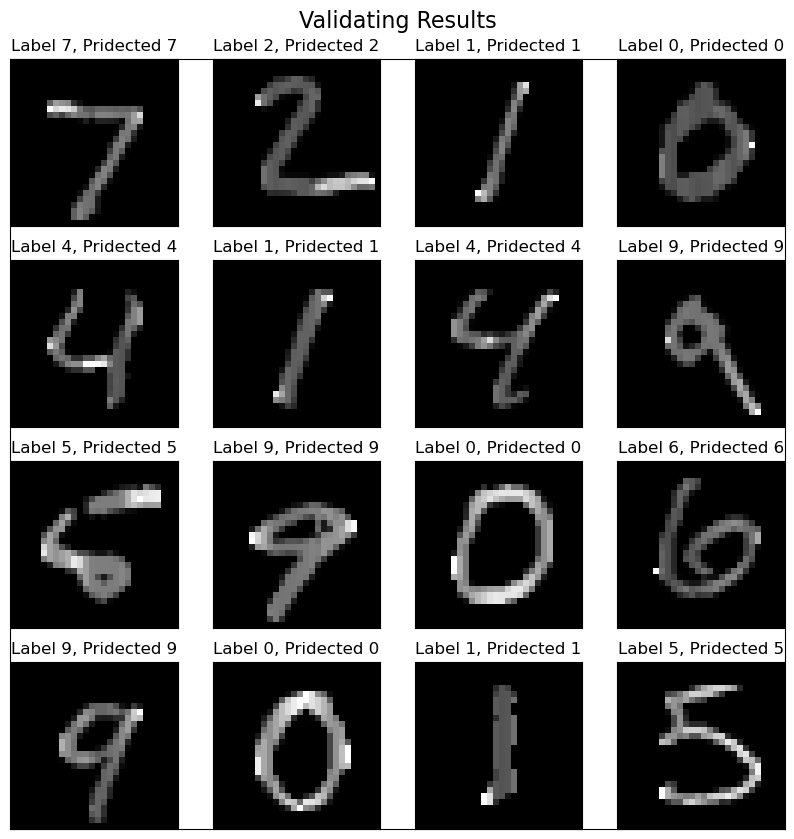

In [11]:
prediction = model.predict(X_test)
plt.figure(figsize=(10, 10))
plt.title("Validating Results", fontsize=16, y= 1.03)
plt.xticks([])
plt.yticks([])
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label {y_test[i]}, Pridected {np.argmax(prediction[i])}")
plt.show()

In [12]:
print("Saving model with name: model")
model.save("model.keras")

Saving model with name: model
